# 4. Modelowanie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# statystyki, metryki
from statistics import mean, stdev
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# podział zbioru
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# standaryzacja
from sklearn.preprocessing import StandardScaler

# modele
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# optymalizacja
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# from sklearn.exceptions import DataConversionWarning
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
# importuję plik z funkcjami w pythonie
import modelling

In [4]:
df = pd.read_csv('Loan_data_after_feature_eng.csv')
df_x = df.drop('target', axis=1)
df_y = df[['target']]

## Uczenie nadzorowane

In [5]:
df_x[sorted(df_x)].columns.tolist()

['acc_ratio',
 'annual_inc',
 'annual_inc_cat_10',
 'annual_inc_log+1',
 'delinq_2yrs',
 'delinq_2yrs_bin',
 'dti',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'earliest_cr_line_year_log+1',
 'emp_length',
 'emp_length_bin',
 'fico_range_low',
 'fico_range_low_cat_num',
 'grade_num',
 'home_MORTGAGE',
 'home_OTHER',
 'home_OWN',
 'home_RENT',
 'inc_source_ver_status',
 'inc_ver_status',
 'inq_last_6mths',
 'inq_last_6mths_log+1',
 'installment',
 'installment_log+1',
 'int_rate',
 'int_rate_log+1',
 'issue_d_month',
 'issue_d_year',
 'loan_amnt',
 'loan_amnt_cat_10',
 'loan_amnt_log+1',
 'open_acc',
 'open_acc_log+1',
 'revol_bal',
 'revol_bal_log+1',
 'revol_util',
 'revol_util_log+1',
 'term',
 'total_acc',
 'total_acc_log+1']

In [6]:
# pierwszy zestaw predyktorów - zmienne wyjściowe
predictors_orig = [
'acc_ratio',
 'annual_inc',
 'delinq_2yrs',
 'dti',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'emp_length',
 'fico_range_low',
 'grade_num',
 'home_MORTGAGE',
 'home_OTHER',
 'home_OWN',
 'home_RENT',
 'inc_source_ver_status',
 'inc_ver_status',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d_month',
 'issue_d_year',
 'loan_amnt',
 'open_acc',
 'revol_bal',
 'revol_util',
 'term',
 'total_acc',
]

In [7]:
# drugi zestaw predyktorów - logarytmowane + dealinq_2yrs binarne
predictors_log = [
'acc_ratio',
 'annual_inc_log+1',
 'delinq_2yrs_bin',
 'dti',
 'earliest_cr_line_month',
 'earliest_cr_line_year_log+1',
 'emp_length',
 'fico_range_low',
 'grade_num',
 'home_MORTGAGE',
 'home_OTHER',
 'home_OWN',
 'home_RENT',
 'inc_source_ver_status',
 'inc_ver_status',
 'inq_last_6mths_log+1',
 'installment_log+1',
 'int_rate_log+1',
 'issue_d_month',
 'issue_d_year',
 'loan_amnt_log+1',
 'open_acc_log+1',
 'revol_bal_log+1',
 'revol_util_log+1',
 'term',
 'total_acc_log+1'
]

In [8]:
df_x = df_x[predictors_log]

### 1. Regresja Logistyczna

In [9]:
logReg = modelling.Model(df_x, df_y, LogisticRegression(max_iter=500))
logReg.train_model()

List of AUROC scores: [0.70382189 0.70197927 0.70031831 0.690808   0.70231742 0.68527503
 0.6887996  0.69733438 0.69934524 0.69614491]

Mean AUROC: 69.661 %


In [10]:
modelling.compare_results('Logistic Regression', logReg.auroc_mean)

,Method,ROC AUC score
1,Logistic Regression,0.697


In [11]:
importances = pd.DataFrame(data={
    'Attribute': df_x.columns,
    'Importance': logReg.model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,15))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

Zmienne o zerowym/znikomym znaczeniu: open_acc, total_acc, inc_ver_status, dti

In [ ]:
# nic nie wywalam na razie, a może i w ogóle.
# df_x = df_x.drop(columns=['dti', 'delinq_2yrs']) # annual_inc_log+1 ??? ta zmienna powinna mieć bardzo duże znaczenie.                                                   

### 2. Random Forest

In [12]:
randFor = modelling.Model(df_x, df_y, RandomForestClassifier())
randFor.train_model()

List of AUROC scores: [0.97855662 0.98072335 0.97828636 0.97428078 0.97756607 0.9764584
 0.97474259 0.9780149  0.9780583  0.97786391]

Mean AUROC: 97.746 %


In [13]:
modelling.compare_results('Random Forest', randFor.auroc_mean)

,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977


### 3. K-NN

Najpierw wybieram optymalne K - sprawdzam średni błąd dla K w zakresie od 1 do 30.

In [14]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=0, stratify = df_y)

In [15]:
modelling.standarize_dataset(train_x)
modelling.standarize_dataset(test_x) # tego spróbowałam, ale zaniepokoił mnie wynik więc spróbowałam jeszcze raz na piechotę
# to zrobić poniżej - z tym samym efektem, więc prawdopodobnie równie dobrze mogłabym użyc funkcji z pliku
# scaler = StandardScaler()

# scaled_x_array = scaler.fit_transform(train_x)
# train_x = pd.DataFrame(scaled_x_array,columns=train_x.columns)

# scaled_x_array = scaler.fit_transform(test_x)
# test_x = pd.DataFrame(scaled_x_array,columns=test_x.columns)

array([[ 0.01716413,  1.1850207 ,  2.91732017, ...,  0.70577665,
         1.66649788, -0.0094807 ],
       [ 0.33649319, -0.53033175, -0.34278034, ...,  0.08900797,
        -0.60006077, -0.42697649],
       [ 0.29892506, -1.03283292, -0.34278034, ..., -0.24908553,
         1.66649788, -0.0094807 ],
       ...,
       [-0.73419838,  0.27810693, -0.34278034, ...,  0.30860349,
        -0.60006077,  0.16884217],
       [-1.1221301 ,  0.06112409,  2.91732017, ...,  0.56235014,
        -0.60006077,  0.3316382 ],
       [ 0.45545892, -2.07635063, -0.34278034, ..., -1.5366839 ,
        -0.60006077,  0.62005011]])

In [16]:
knn_error=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,np.ravel(train_y))
    pred_i = knn.predict(test_x)
    knn_error.append(np.mean(pred_i != test_y.values)) 

Text(0, 0.5, 'Mean error')

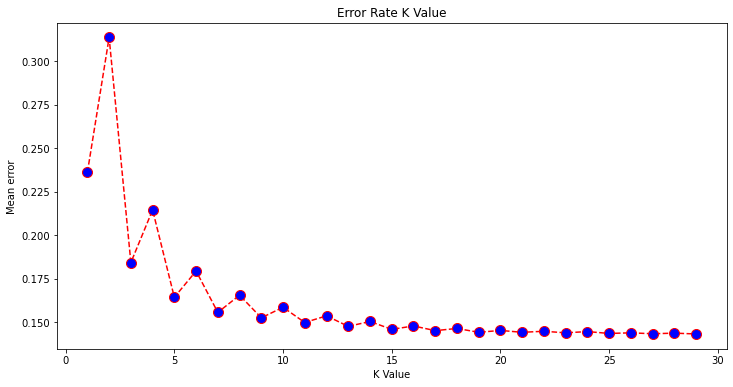

In [17]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), knn_error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')
# LOL czemu 

In [18]:
# wybieram k = 13
knn = modelling.Model(df_x, df_y, KNeighborsClassifier(n_neighbors=13))
knn.train_model()
modelling.compare_results('KNN Classifier', knn.auroc_mean)

List of AUROC scores: [0.90093852 0.90047112 0.89074797 0.88212875 0.89267913 0.88735598
 0.89010712 0.89284835 0.89122513 0.894107  ]

Mean AUROC: 89.226 %


,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977
3,KNN Classifier,0.892


### 4. MLP

In [19]:
mlp = modelling.Model(df_x, df_y, MLPClassifier(max_iter=1000))
mlp.train_model()
modelling.compare_results('MLP Classifier', mlp.auroc_mean)

List of AUROC scores: [0.85305749 0.84808758 0.85265261 0.8461534  0.84894444 0.83736873
 0.83943465 0.86157494 0.84611693 0.84277438]

Mean AUROC: 84.762 %


,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977
3,KNN Classifier,0.892
4,MLP Classifier,0.848


### 5. XGBoost

In [20]:
xgbm = modelling.Model(df_x, df_y, XGBClassifier())
xgbm.train_model()
modelling.compare_results('XGBoost', xgbm.auroc_mean)

List of AUROC scores: [0.94636448 0.95173921 0.95047965 0.9435281  0.94870693 0.94967115
 0.94414353 0.94783486 0.94866326 0.95080687]

Mean AUROC: 94.819 %


,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977
3,KNN Classifier,0.892
4,MLP Classifier,0.848
5,XGBoost,0.948


### 6. Light GBM Boost

In [21]:
lgbm = modelling.Model(df_x, df_y, LGBMClassifier())
lgbm.train_model()
modelling.compare_results('Light GBM', lgbm.auroc_mean)

List of AUROC scores: [0.94917433 0.95299436 0.95313671 0.94324042 0.94968632 0.95039758
 0.94713973 0.95123475 0.94814525 0.95262553]

Mean AUROC: 94.978 %


,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977
3,KNN Classifier,0.892
4,MLP Classifier,0.848
5,XGBoost,0.948
6,Light GBM,0.950


# Modele na zbiorze PCA

### Regresja Logistyczna - PCA

In [22]:
logReg_pca = modelling.Model(df_x, df_y, LogisticRegression(max_iter=500))
logReg_pca.train_model_pca()
modelling.compare_results('Logistic Regression PCA', logReg_pca.auroc_mean)

List of AUROC scores: [0.69385332 0.69185329 0.69318957 0.67903939 0.6979513  0.67462767
 0.67937012 0.68618357 0.68695077 0.69001625]

Mean AUROC: 68.73 %


,Method,ROC AUC score
1,Logistic Regression,0.697
2,Random Forest,0.977
3,KNN Classifier,0.892
4,MLP Classifier,0.848
5,XGBoost,0.948
6,Light GBM,0.950
7,Logistic Regression PCA,0.687


### Random forest - PCA

In [ ]:
randFor_pca = modelling.Model(df_x, df_y, RandomForestClassifier())
randFor_pca.train_model_pca()
modelling.compare_results('Random Forest PCA', randFor_pca.auroc_mean)

### KNN - PCA

In [ ]:
knn_pca = modelling.Model(df_x, df_y, KNeighborsClassifier(n_neighbors=15))
knn_pca.train_model_pca()
modelling.compare_results('KNN Classifier PCA', knn_pca.auroc_mean)

### MLP - PCA

In [ ]:
mlp_pca = modelling.Model(df_x, df_y, MLPClassifier(max_iter=1000))
mlp_pca.train_model_pca()
modelling.compare_results('MLP Classifier PCA', mlp_pca.auroc_mean)

### XGBoost - PCA

In [ ]:
xgbm_pca = modelling.Model(df_x, df_y, XGBClassifier())
xgbm_pca.train_model_pca()
modelling.compare_results('XGBoost PCA', xgbm_pca.auroc_mean)

### Light GBM - PCA

In [ ]:
lgbm_pca = modelling.Model(df_x, df_y, LGBMClassifier())
lgbm_pca.train_model_pca()
modelling.compare_results('Light GBM PCA', lgbm_pca.auroc_mean)

(podsumowanie zmienić oczywiście po dojściu do ładu z modelami)

Podsumowując działanie modeli na danych po PCA - w żadnym modelu poprawa metryki AUC ROC nie była wyraźna.

Modele, które odniosły lepszy rezultat przy PCA: MLP

Modele, które uzyskały niższy wynik: XGBoost, Light GBM

Porównywalny: regresja logistyczna, random forest, KNN

Najlepszy wynik osiągnęłam przy regresji logistycznej oraz Light GBM.

##  Optymalizacja

In [30]:
df = pd.read_csv("Loan_data_new_variables.csv")
df_x = df.drop('target', axis=1)
df_y = df[['target']]
df_x = df_x[predictors_orig]

In [ ]:
# usuwam zmienne o znikomej istotności dla modelu
df_x = df_x.drop(columns=['open_acc', 'total_acc', 'inc_ver_status', 'dti'])

### Regresja logistyczna

In [ ]:
logReg2 = modelling.Model(df_x, df_y, LogisticRegression(max_iter=500))
logReg2.train_model()
modelling.compare_results('Logistic Regression - different predictors', logReg2.auroc_mean)

Wynik na innym zestawie predyktorów oraz po usunięciu nieistotnych zmiennych nie zmienił się. (potwierdzić po wykonaniu)

### GridSearch

In [6]:
logReg3 = modelling.Model(df_x, df_y, LogisticRegression(max_iter=1500))
logReg3.train_model_grid_search({'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                  'C': [100, 10, 1.0, 0.1, 0.01]})

Best: 0.6873432400059986 using {'C': 0.01, 'solver': 'newton-cg'}
0.6872191804992192 with:{'C': 100, 'solver': 'newton-cg'}
0.679413792667361 with:{'C': 100, 'solver': 'lbfgs'}
0.677860522631304 with:{'C': 100, 'solver': 'liblinear'}
0.6721171037010375 with:{'C': 100, 'solver': 'sag'}
0.6673569039644593 with:{'C': 100, 'solver': 'saga'}
0.6872296184240877 with:{'C': 10, 'solver': 'newton-cg'}
0.6791024326034809 with:{'C': 10, 'solver': 'lbfgs'}
0.6776391937906521 with:{'C': 10, 'solver': 'liblinear'}
0.6721171037010375 with:{'C': 10, 'solver': 'sag'}
0.6673569039644593 with:{'C': 10, 'solver': 'saga'}
0.6872866710627562 with:{'C': 1.0, 'solver': 'newton-cg'}
0.6786606805904057 with:{'C': 1.0, 'solver': 'lbfgs'}
0.6780381401333577 with:{'C': 1.0, 'solver': 'liblinear'}
0.6721171037010375 with:{'C': 1.0, 'solver': 'sag'}
0.6673569039644593 with:{'C': 1.0, 'solver': 'saga'}
0.6873060269686481 with:{'C': 0.1, 'solver': 'newton-cg'}
0.6793359851525947 with:{'C': 0.1, 'solver': 'lbfgs'}
0.67

C:\Users\Hela\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Nie widać zauważalnej różnicy pomiędzy różnymi ustawieniami parametrów. 
ver2: W grid search nawet najlepszy wynik był gorszy od tego otrzymanego bez optymalizacji.

Drugi w kolejności model pod względem AUC ROC score to był Light GBM - wykonam więc jeszcze jego optymalizację.

### Light GBM

In [ ]:
# uruchamiam najpierw model na zmienionym zestawie predyktorów
lgbm2 = modelling.Model(df_x, df_y, LGBMClassifier())
lgbm2.train_model()
modelling.compare_results('Light GBM - different predictors', lgbm2.auroc_mean)

Wyniki na pozostałych zestawach predyktorów: 
- Na predyktorach oryginalnych predictors_orig - 68,54%
- logarytmicznych predictors_log - 68,439%
- kategoryzowanych predictors_cat -  68,601%
- logarytmicznych bez najmniej istotnych zmiennych - 68,758%

In [ ]:
# trenuję model jeszcze raz w uproszczony sposób, aby wyświetlić feature importances
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=0, stratify = df_y['target'])
lgbm2.fit(train_x, np.ravel(train_y))

In [ ]:
lgb.plot_importance(lgbm2, figsize=(40,20))

Z wykresu feature importances wynika, że najmniejsze znaczenie dla modelu posiadają zmienne: revol_bal_outliers, loan_amnt_bin oraz delinq_2yrs_outliers. Usuwam je więc z zestawu predyktorów.

In [ ]:
df_x = df_x.drop(columns=['revol_bal_outliers', 'loan_amnt_bin', 'delinq_2yrs_outliers'])

In [ ]:
# powtarzam operację powyżej
lgbm2 = modelling.Model(df_x, df_y, LGBMClassifier())
lgbm2.train_model()
modelling.compare_results('Light GBM - different predictors', lgbm2.auroc_mean)

Wynik pozostał taki sam.


### Light GBM Grid Search

Manipuluję parametrami, jednak ze względu na czas obliczeniowy dzielę to na dwie tury, pozostawiając częśc parametrów stałych.

dla parametrów:
  - 'num_leaves' default = 31
  - 'max_depth': [-1, 5, 10],
  - 'min_child_samples': [20, 40, 60, 80, 100],
  - 'max_bin' default = 255
  - 'boosting_type': ['dart', 'gbdt', 'goss'],
  - 'learning_rate' default = 0.1

Najlepszy wynik:

Best: 0.6892187140351865 using {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 100}

In [9]:
lgbm3 = modelling.Model(df_x, df_y, LGBMClassifier(random_state = 0))
lgbm3.train_model_grid_search({ 'max_depth': [5],
                                'min_child_samples': [100, 120, 140, 200],
                                'boosting_type': ['dart'],
                                })

Best: 0.938457450626209 using {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 100}
0.938457 (0.003016) with: {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 100}
0.938101 (0.003366) with: {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 120}
0.938164 (0.003080) with: {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 140}
0.937232 (0.003172) with: {'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 200}


Ustawiam więc 'boosting_type': 'dart', 'max_depth': 5, 'min_child_samples': 100

Następna część hiperparametrów:

przy tych parametrach:
- 'num_leaves': [50, 70, 90, 110], # less then 2^max_depth, default 31, large may cause overfitting
- 'max_bin': [200, 350, 500], # default is 255, larger for better accuracy
- 'learning_rate': [0.01, 0.05, 0.1, 0.3] # small for better accuracy, default 0.1

Best: 0.68876 using {'learning_rate': 0.1, 'max_bin': 200, 'num_leaves': 50}

przy kolejnych:
- 'num_leaves': [20, 31, 50, 70], # less then 2^max_depth, default 31, large may cause overfitting
- 'max_bin': [150, 200, 350], # default is 255, larger for better accuracy
- 'learning_rate': [0.05, 0.1] # small for better accuracy, default 0.1

Best: 0.6895239010483522 using {'learning_rate': 0.1, 'max_bin': 350, 'num_leaves': 20}

przy kolejnych:
- 'num_leaves': [8, 9, 10, 15, 20, 31], # less then 2^max_depth, default 31, large may cause overfitting
- 'max_bin': [200, 350, 400, 450], # default is 255, larger for better accuracy
- 'learning_rate': [0.1] # small for better accuracy, default 0.1

Best: 0.6904702388372592 using {'learning_rate': 0.1, 'max_bin': 200, 'num_leaves': 10}

In [ ]:
lgbm4 = modelling.Model(df_x, df_y, LGBMClassifier(random_state = 0, 
                                                   boosting_type='dart', 
                                                   max_depth = 5, 
                                                   min_child_samples = 100))
lgbm4.train_model_grid_search({ 'num_leaves': [8, 9, 10],
                                'max_bin': [200],
                                'learning_rate': [0.1]
                            })

Wybieram więc ostateczne hiperparametry i trenuję z nimi model raz jeszcze.

In [ ]:
lgbm5 = modelling.Model(df_x, df_y, LGBMClassifier(num_leaves = 10,
                                                     max_depth = 5,
                                                     min_child_samples = 100,
                                                     max_bin = 200,
                                                     boosting_type = 'dart',
                                                     learning_rate = 0.1
                                                    ))
lgbm5.train_model()
modelling.compare_results('Light GBM - optimized parameters', lgbm5.auroc_mean)

To jest mój ostateczny model z wynikiem 68,869% - jak widać optymalizacja hiperparametrów nie poprawiła wyniku wyraźnie. Jest to prawdopodobnie maksimum, które można otrzymac przy danym zbiorze.